ноутбук создан в google colab

# 1. Ваш первый агент на Langchain

Agents are systems that use an LLM as a reasoning engine to determine which actions to take and what the inputs to those actions should be. The results of those actions can then be fed back into the agent and it determine whether more actions are needed, or whether it is okay to finish. [Источник](https://python.langchain.com/v0.2/docs/concepts/)

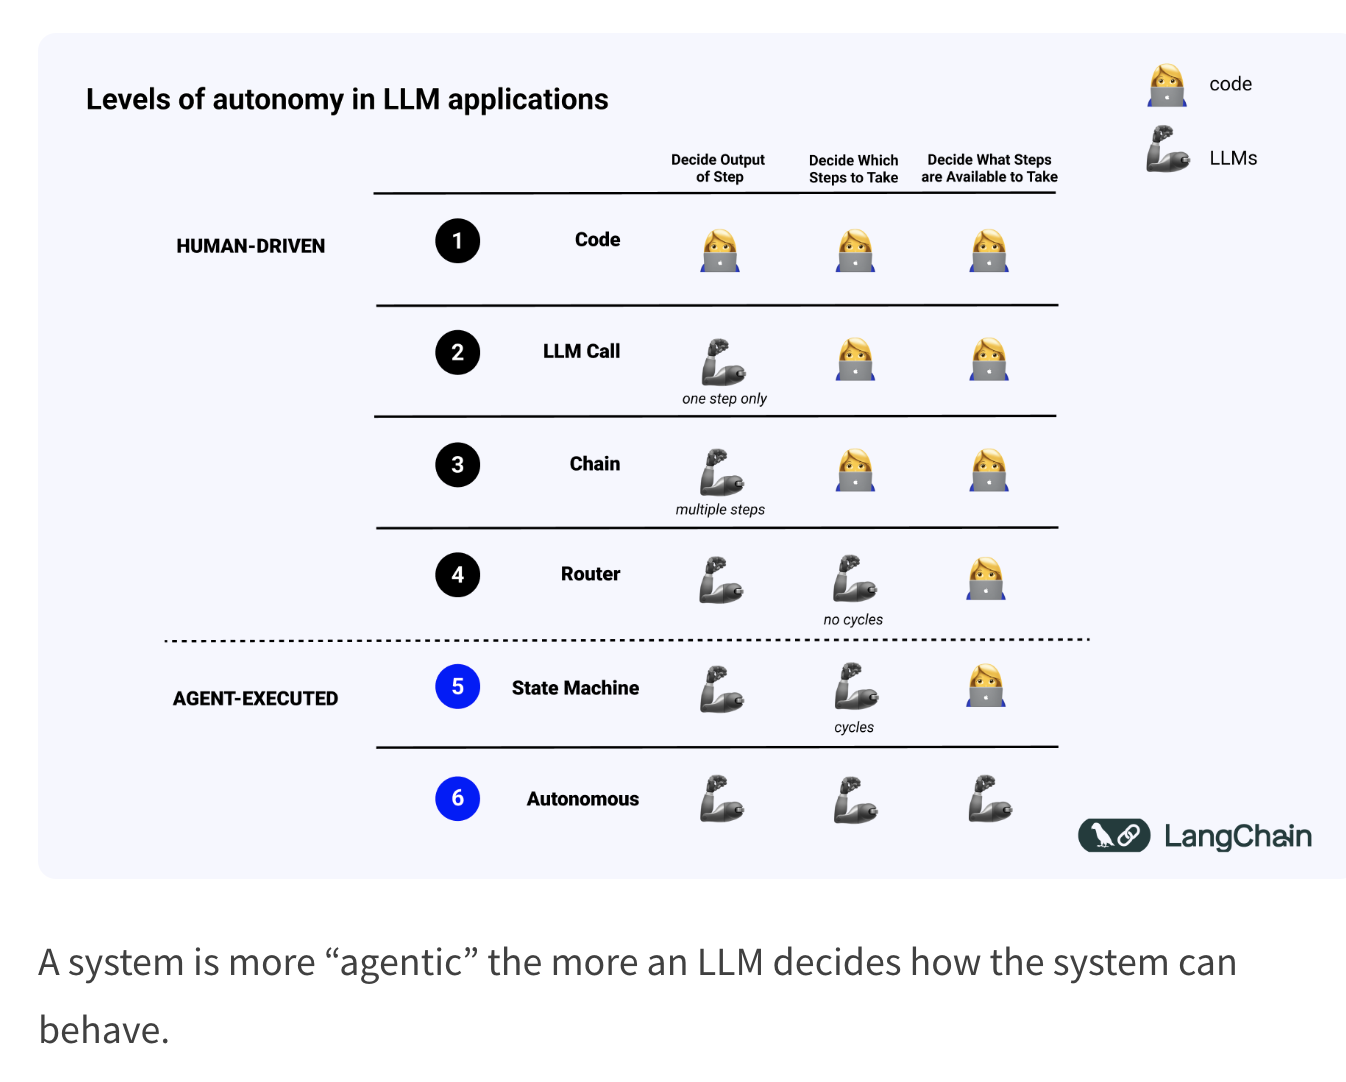

https://blog.langchain.com/what-is-an-agent/

Langchain - самый популярный агентский фреймворк по числу звезд

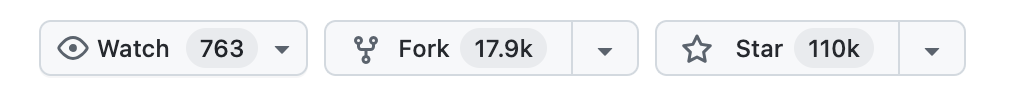

Выбор модели для сегодняшнего семинара

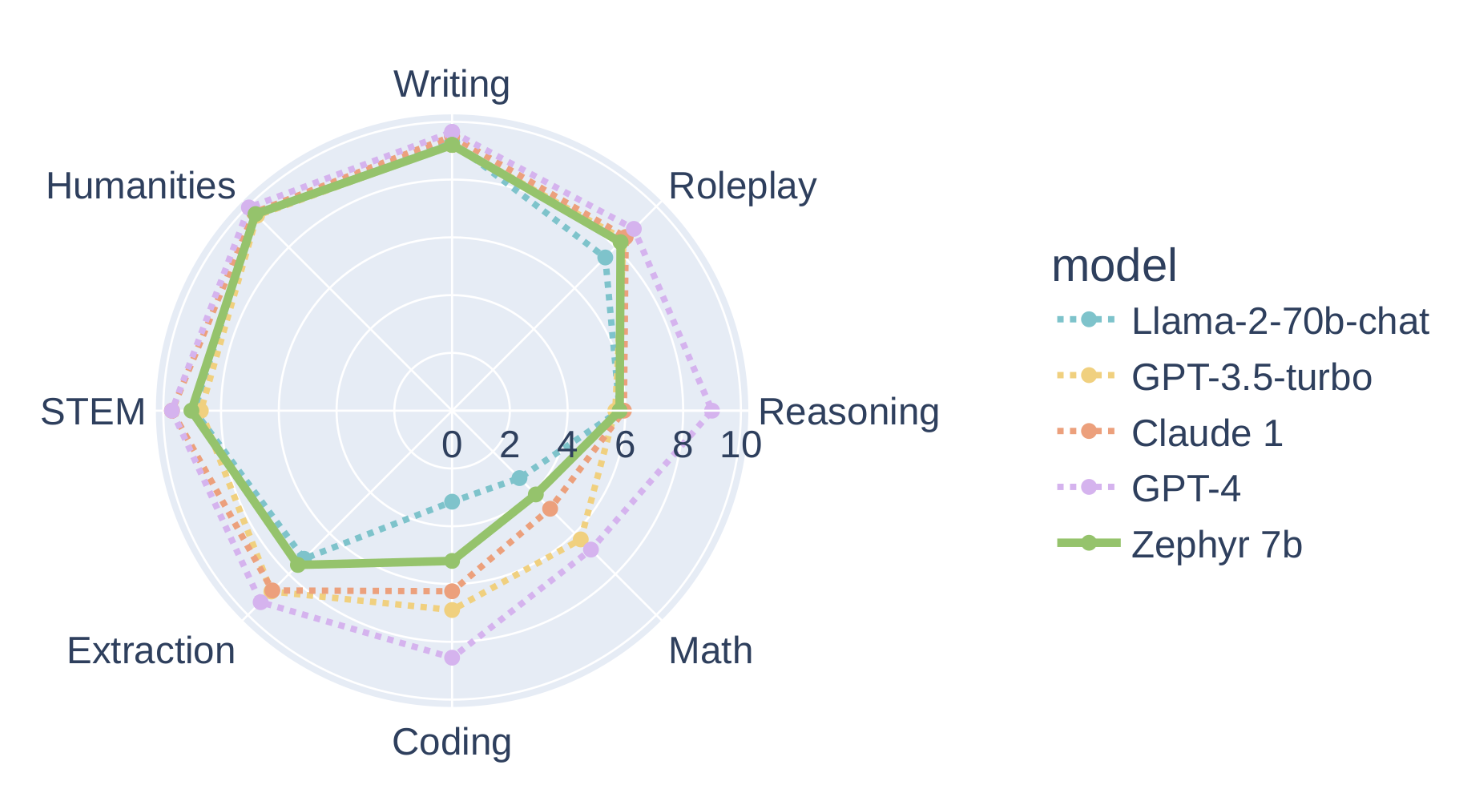

https://huggingface.co/HuggingFaceH4/zephyr-7b-beta

# Простой поисковый агент

In [ ]:
! pip install -q langchain langgraph google-search-results langchain-community

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.0 MB/s eta 0:00:00


OPENAI_API_KEY токен мы уже получали, теперь понадобится токен Search API

https://www.searchapi.io/

In [ ]:
%pip install -U -q openai

In [ ]:
%pip install -q langchain langgraph google-search-results langchain-community

In [ ]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass(prompt="Введите ваш токен OPENAI_API_KEY:")

Введите ваш токен OPENAI_API_KEY:··········


In [ ]:
os.environ["SEARCHAPI_API_KEY"] = getpass(prompt="Введите ваш токен SEARCHAPI_API:")

Введите ваш токен SEARCHAPI_API:··········


In [ ]:
from langchain.agents import initialize_agent, load_tools, AgentType
from langchain_community.chat_models import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4",
    temperature=0
)


tools = load_tools(["searchapi"])

agent_executor = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True,
    stop=["Observation:", "Final Answer:"]
)

question = "Какая высота главного здания МГУ в метрах?"

response = agent_executor.invoke(question)

print(response)




> Entering new AgentExecutor chain...
Мне нужно найти информацию о высоте главного здания МГУ.
Action: searchapi
Action Input: Высота главного здания МГУ
Observation: Main building of Moscow State University Height: 597′, 787′ to tip
Thought:Я нашел информацию о высоте главного здания МГУ в футах. Мне нужно перевести это в метры.
Action: searchapi
Action Input: 787 feet to meters
Observation: 787 feet equal 239.8776 meters (787ft = 239.8776m). Converting 787 ft to m is easy. Simply use our calculator above, or apply the formula to change the length ...
One foot is equal to 0.3048 meters. Therefore, to convert a measurement in feet to meters, you need to multiply the number of feet by 0.3048.
Foot (ft) is a unit of length. One foot is equal to 12 inches (in). One foot is equal to 1/3 of a yard (yd). One foot is eqaul to 0.3048 meter (m).
Foot. Foot (ft) is a unit of length. One foot is equal to 12 inches (in). One foot is equal to 1/3 of a yard (yd). One foot is eqaul to 0.3048 meter 

Так все же, что это за типы агентов?

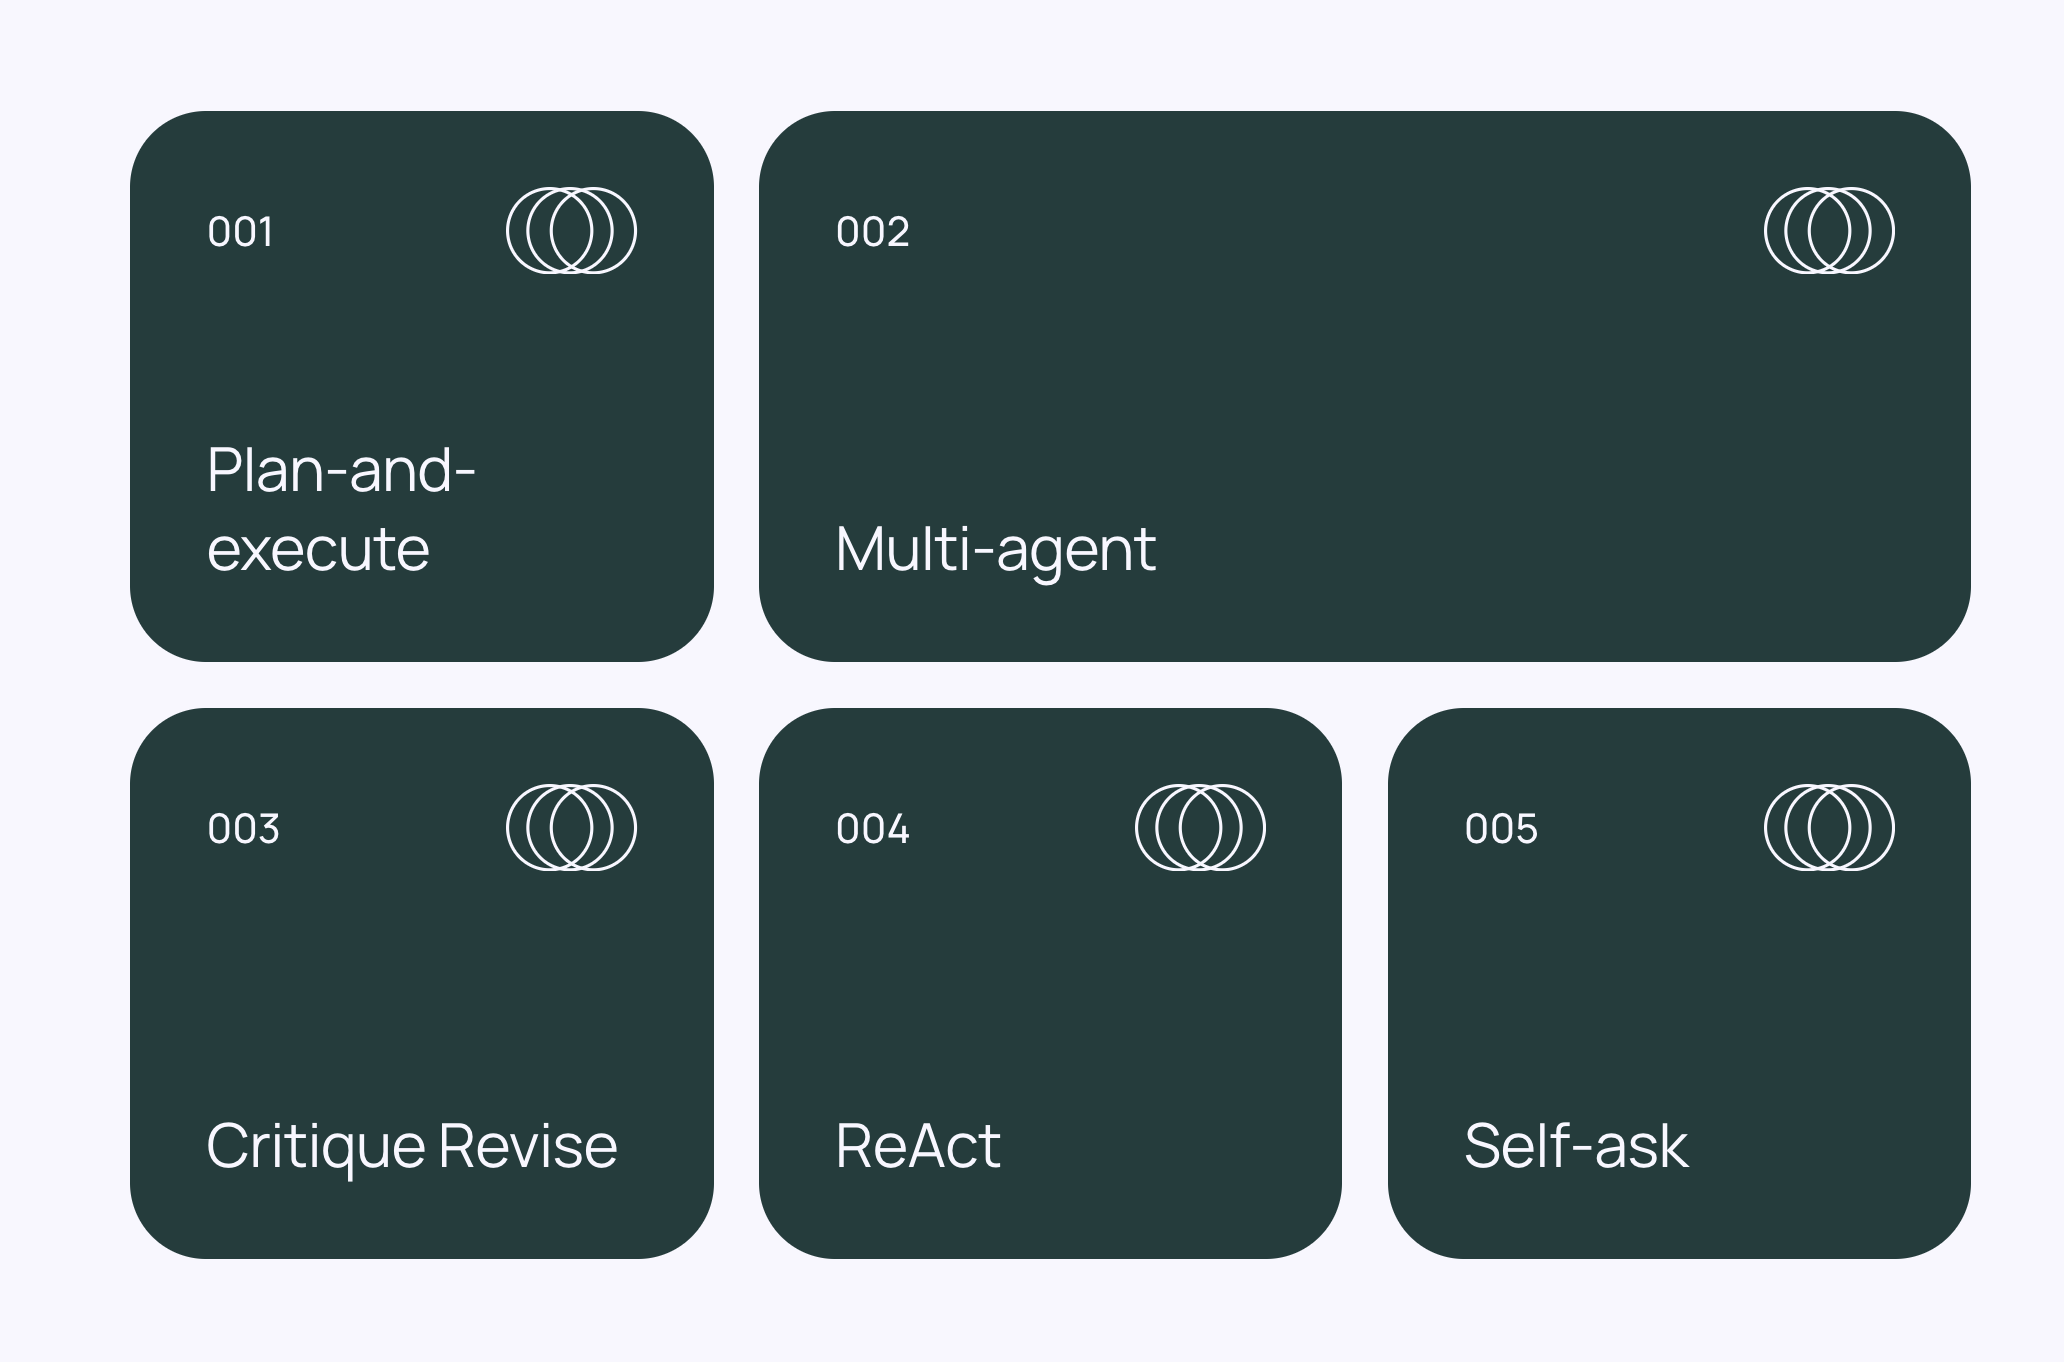



Которые здесь

https://api.python.langchain.com/en/latest/agents/langchain.agents.agent_types.AgentType.html

с ReAct еще понятно https://arxiv.org/pdf/2210.03629:










Реализации их здесь https://github.com/langchain-ai/langchain/tree/4ee6112161e63c320320da4ad4d56380604c35f1/libs/langchain/langchain/agents

# Напишем свой кастомный тул

In [ ]:
from langchain.agents import tool

@tool
def squared(a: float) -> float:
    """Вычисляет квадрат высоты в квадратных метрах"""
    try :
      a = float(a)
      return a * a
    except:
      return float(a[0]) * float(a[0])


In [ ]:
tools = load_tools(["searchapi"])
tools.append(squared)

In [ ]:
from langchain.agents import create_structured_chat_agent


In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent

prompt = hub.pull("hwchase17/structured-chat-agent")
agent = create_structured_chat_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

question = "Какой квадрат высоты главного здания МГУ? Ответ нужен в квадратных метрах"

print("Input keys:", agent_executor.input_keys)
response = agent_executor.invoke({"input": question})

print(response)


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Input keys: []


> Entering new AgentExecutor chain...
Thought: I need to find the height of the main building of Moscow State University (MSU) first. I will use the searchapi tool to find this information.
Action:
```
{
  "action": "searchapi",
  "action_input": {"query": "height of main building of Moscow State University in meters"}
}
```239 metresThe height of the main building of Moscow State University is 239 meters. Now I will use the squared tool to calculate the square of this height.
Action:
```
{
  "action": "squared",
  "action_input": {"a": 239}
}
``` 57121.0The square of the height of the main building of Moscow State University is 57121 square meters. Now I can provide the final answer.
Action:
```
{
  "action": "Final Answer",
  "action_input": "Квадрат высоты главного здания МГУ составляет 57121 квадратных метра."
}
```

> Finished chain.
{'input': 'Какой квадрат высоты главного здания МГУ? Ответ нужен в квадратных метрах', 'output': 'Квадрат высоты главного здания МГУ

# Усложним

In [ ]:
@tool
def ratio_metro_height(height: float, distance_to_metro: float) -> float:
    """Вычисляет отношение высоты здания к расстоянию до ближайшего метро"""
    try :
      height = float(height)
    except:
      height = float(height[0])
    try :
      distance_to_metro = float(distance_to_metro)
      return height / distance_to_metro
    except:
      distance_to_metro = float(distance_to_metro[0])
      return height / distance_to_metro

In [ ]:
tools = load_tools(["searchapi"])
tools.append(squared)
tools.append(ratio_metro_height)

In [ ]:
agent = create_structured_chat_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

question = "Во сколько раз соотносятся расстояние от МГУ до ближайшего метро и высота самого здания?"


response = agent_executor.invoke({"input": question})

print(response)




> Entering new AgentExecutor chain...
Thought: I need to find the height of the MSU building and the distance to the nearest metro station. I'll start by finding the height of the MSU building.
Action:
```
{
  "action": "searchapi",
  "action_input": {
    "query": "height of MSU building in meters"
  }
}
```The 104-foot-tall (32 m) tower marks the site of College Hall, the first building constructed on the campus, as well as the first building in America erected ...
The main building of Moscow State University is a 239-metre (784 ft), 36-story (central part) skyscraper in Moscow, Russia. It was designed by Lev Rudnev as ...
The tower is 104.67 feet tall at its highest spire. The sculpture on the tower is that of a Sower with an inscription that reads, “Whatsoever a Man Soweth.” The ...
Metrics. Height 81.4 m / 267 ft. Floors 4 ...
MSU's campus has more than 560 buildings comprising almost 24.5 million square feet. From the electrical grid, steam tunnels and water mains under campus,

# Как писать тулы?


1.   Выбрать модель, которая поддерживает тулы при вашем инференсе (см предыдущие части урока)
2.   Фиксировать входные типы
3.   Few-shot промтить llm чтобы показать что делает тул
4.   Фиксировать формат выхода


## Страница для выбора модели

[Таблица](https://python.langchain.com/v0.2/docs/integrations/chat/)

Если вы развернули у себя LLM локально (через Ollama, vLLM, llama.cpp, LM Studio и тд) то выбирайте те варианты где этот вариант отмечен.

Мультимодальность и json нам в этом уроке не понадобятся

In [6]:
%pip  install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 1.7 MB/s eta 0:00:00


In [5]:
%pip install -q langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00


In [3]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass(prompt="Введите ваш токен OPENAI_API_KEY:")


Введите ваш токен OPENAI_API_KEY:··········


In [8]:
from langchain.agents import initialize_agent, load_tools, AgentType
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4",
    temperature=0
)

## Снова напишем тулы

Выше мы писали примерно так

In [10]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Add two integers.

    Args:
        a: First integer
        b: Second integer
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two integers.

    Args:
        a: First integer
        b: Second integer
    """
    return a * b

In [14]:
tools = [add, multiply]
llm_with_tools = llm.bind_tools(tools)
query = "What is 3 * 12?"
llm_with_tools.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f5w6EBEHxPoaNKLS4cNjlkWH', 'function': {'arguments': '{\n  "a": 3,\n  "b": 12\n}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 85, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-BprVawfUYrVdgIdyeRPcOe86XdRU7', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2b8a859a-31fa-4e18-aca6-37b1ca092863-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_f5w6EBEHxPoaNKLS4cNjlkWH', 'type': 'tool_call'}], usage_metadata={'input_tokens': 85, 'output_tokens': 21, 'total_tokens': 106, 'input_token_details': {'audio': 0, 'cache_read'

In [15]:
llm_with_tools.invoke(query).tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_69v8ml1qwLltkkYIXbw0p5aW',
  'type': 'tool_call'}]

Модель можно принудить всегда использовать конкретный тул или хотя бы один (в bid_tools достуточно установить аргумент tool_choice="any" или указать название тула)

Можно использовать PyDantic

In [17]:
# Note that the docstrings here are crucial, as they will be passed along
# to the model along with the class name.
class Add(BaseModel):
    """Add two integers together."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


class Multiply(BaseModel):
    """Multiply two integers together."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


tools_pydantic = [Add, Multiply]

In [21]:
llm_with_tools_pydantic = llm.bind_tools(tools_pydantic)
query = "What is 2 * 8?"
llm_with_tools_pydantic.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AGf3gnpiL4K2cLPzxtTVQtlr', 'function': {'arguments': '{\n  "a": 2,\n  "b": 8\n}', 'name': 'Multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 98, 'total_tokens': 120, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-BprzoPxk5oASD8m5EM7q5pnlZwr8D', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4fe97d4f-1b03-416c-97be-51121c3b2ba5-0', tool_calls=[{'name': 'Multiply', 'args': {'a': 2, 'b': 8}, 'id': 'call_AGf3gnpiL4K2cLPzxtTVQtlr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 98, 'output_tokens': 22, 'total_tokens': 120, 'input_token_details': {'audio': 0, 'cache_read': 

In [22]:
llm_with_tools_pydantic.invoke(query).tool_calls

[{'name': 'Multiply',
  'args': {'a': 2, 'b': 8},
  'id': 'call_KWjwymzZhqwaraYFkFC3FkCV',
  'type': 'tool_call'}]

In [24]:
from langchain_core.output_parsers import PydanticToolsParser
chain = llm_with_tools_pydantic | PydanticToolsParser(tools=[Add, Multiply])
chain.invoke(query)

[Multiply(a=2, b=8)]

In [26]:
query = "What is result of 3 + 8? "
chain = llm_with_tools_pydantic | PydanticToolsParser(tools=[Add, Multiply])
chain.invoke(query)

[Add(a=3, b=8)]

Или TypeDict

In [27]:
from typing_extensions import Annotated, TypedDict


class add(TypedDict):
    """Add two integers."""

    a: Annotated[int, ..., "First integer"]
    b: Annotated[int, ..., "Second integer"]


class multiply(BaseModel):
    """Multiply two integers."""

    a: Annotated[int, ..., "First integer"]
    b: Annotated[int, ..., "Second integer"]


tools_td = [add, multiply]

In [28]:
llm_with_tools_td = llm.bind_tools(tools_td)
chain = llm_with_tools_td | PydanticToolsParser(tools=[add, multiply])
chain.invoke(query)

[{'a': 3, 'b': 8}]

Кто-нибудь заметил отсутствие `return`? 😅

## Few-shot промтинг тулов

Теперь попробуем дать query чуть посложнее

In [29]:
query = "What is result of 3 + 8 * 5? "
chain = llm_with_tools_pydantic | PydanticToolsParser(tools=[Add, Multiply])
chain.invoke(query)

[Multiply(a=8, b=5)]

Вопрос к аудитории -- то , что агент не прибавил тройку -- хорошо или плохо?

Обратимся к [туториалу](https://python.langchain.com/v0.2/docs/how_to/tools_few_shot/)

In [31]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Adds a and b."""
    return a + b


@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b."""
    return a * b


tools = [add, multiply]
llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)
llm_with_tools = llm.bind_tools(tools) # другая модель
llm_with_tools.invoke(
    "Whats 119 times 8 minus 20. Don't do any math yourself, only use tools for math. Respect order of operations" # дополнили промпт
).tool_calls

[{'name': 'multiply',
  'args': {'a': 119, 'b': 8},
  'id': 'call_sUL2NA84LmrVbIpHvXhxttOA',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 952, 'b': -20},
  'id': 'call_R2mFWsN0qh279qqgdUPnCQWJ',
  'type': 'tool_call'}]

Вот что пишут в инструкции:

> The model shouldn't be trying to add anything yet, since it technically can't know the results of 119 * 8 yet.

Хотя если присмотреться, он как раз посчитал (952 в точности равно 119*8) и затем вычитает 20

In [32]:
from langchain_core.messages import AIMessage, HumanMessage, ToolMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

examples = [
    HumanMessage(
        "What's the product of 317253 and 128472 plus four", name="example_user"
    ),
    AIMessage(
        "",
        name="example_assistant",
        tool_calls=[
            {"name": "Multiply", "args": {"x": 317253, "y": 128472}, "id": "1"}
        ],
    ),
    ToolMessage("16505054784", tool_call_id="1"), # ответ тула
    AIMessage(
        "",
        name="example_assistant",
        tool_calls=[{"name": "Add", "args": {"x": 16505054784, "y": 4}, "id": "2"}],
    ),
    ToolMessage("16505054788", tool_call_id="2"), # ответ тула
    AIMessage(
        "The product of 317253 and 128472 plus four is 16505054788",
        name="example_assistant",
    ), # ответ цепочки
]

system = """You are bad at math but are an expert at using a calculator.

Use past tool usage as an example of how to correctly use the tools."""
few_shot_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        *examples,
        ("human", "{query}"),
    ]
)

chain = {"query": RunnablePassthrough()} | few_shot_prompt | llm_with_tools
chain.invoke("Whats 119 times 8 minus 20").tool_calls

[{'name': 'multiply',
  'args': {'a': 119, 'b': 8},
  'id': 'call_w9FyU59erZBE2ht4x01gTBCs',
  'type': 'tool_call'}]

In [34]:
chain.invoke("Whats 119 times 8 minus 20")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qhr6E6hEZ9Lk5lL8Sx1KZxNd', 'function': {'arguments': '{"a":119,"b":8}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 226, 'total_tokens': 243, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BpsRFZcFenF74t4GNMB5HLPItxDK5', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--05b72eba-bd3f-4b2c-a97c-55177a653233-0', tool_calls=[{'name': 'multiply', 'args': {'a': 119, 'b': 8}, 'id': 'call_qhr6E6hEZ9Lk5lL8Sx1KZxNd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 226, 'output_tokens': 17, 'total_tokens': 243, 'input_token_details': {'audio': 0, 'cache_read'

Почему поле `content` пустое? Нам бы все же ответ получить

In [42]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import AIMessage, HumanMessage, ToolMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI

@tool
def add(a: int, b: int) -> int:
    """Adds two numbers together. Use for both addition and subtraction (with negative numbers)."""
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies two numbers together. Also handles division via reciprocal (e.g., a / b = a * (1/b))."""
    return a * b

tools = [add, multiply]

examples = [
    HumanMessage("What's 15 times 3 plus 10?"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "multiply",
                "args": {"a": 15, "b": 3},
                "id": "1"
            }
        ]
    ),
    ToolMessage("45", tool_call_id="1"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "add",
                "args": {"a": 45, "b": 10},
                "id": "2"
            }
        ]
    ),
    ToolMessage("55", tool_call_id="2"),
    AIMessage("15 times 3 plus 10 equals 55"),

    HumanMessage("Calculate 100 minus 7 times 8"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "multiply",
                "args": {"a": 7, "b": 8},
                "id": "3"
            }
        ]
    ),
    ToolMessage("56", tool_call_id="3"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "add",
                "args": {"a": 100, "b": -56},
                "id": "4"
            }
        ]
    ),
    ToolMessage("44", tool_call_id="4"),
    AIMessage("100 minus 7 times 8 equals 44")
]

prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an expert calculator assistant.
    Always use tools for math operations.
    Follow order of operations (PEMDAS/BODMAS)."""),
    *examples,
    MessagesPlaceholder("chat_history", optional=True),
    ("human", "{input}"),
    MessagesPlaceholder("agent_scratchpad")
])


llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)
agent = create_tool_calling_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
result = agent_executor.invoke({"input": "Whats 119 times 8 minus 20"})
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `multiply` with `{'a': 119, 'b': 8}`


952
Invoking: `add` with `{'a': 952, 'b': -20}`


932119 times 8 minus 20 equals 932

> Finished chain.
119 times 8 minus 20 equals 932


## Формат выхода

Ура! Но мб числом получать ответ?

Самый очевидный способ -- попросить в промте, поправить примеры

Самый спорный -- `from langchain_core.output_parsers import StrOutputParser`

Это не самая сильная сторона библиотеки, поэтому парсеринг ответов покажем уже в других кейсах на лругих библиотеках

In [43]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import AIMessage, HumanMessage, ToolMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI

@tool
def add(a: int, b: int) -> int:
    """Adds two numbers together. Use for both addition and subtraction (with negative numbers)."""
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies two numbers together. Also handles division via reciprocal (e.g., a / b = a * (1/b))."""
    return a * b

tools = [add, multiply]

examples = [
    HumanMessage("What's 15 times 3 plus 10?"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "multiply",
                "args": {"a": 15, "b": 3},
                "id": "1"
            }
        ]
    ),
    ToolMessage("45", tool_call_id="1"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "add",
                "args": {"a": 45, "b": 10},
                "id": "2"
            }
        ]
    ),
    ToolMessage("55", tool_call_id="2"),
    AIMessage("55"),

    HumanMessage("Calculate 100 minus 7 times 8"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "multiply",
                "args": {"a": 7, "b": 8},
                "id": "3"
            }
        ]
    ),
    ToolMessage("56", tool_call_id="3"),
    AIMessage(
        "",
        tool_calls=[
            {
                "name": "add",
                "args": {"a": 100, "b": -56},
                "id": "4"
            }
        ]
    ),
    ToolMessage("44", tool_call_id="4"),
    AIMessage("44")
]

prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an expert calculator assistant.
    Always use tools for math operations.
    Follow order of operations (PEMDAS/BODMAS).
    As final answer provide only the resulting number"""),
    *examples,
    MessagesPlaceholder("chat_history", optional=True),
    ("human", "{input}"),
    MessagesPlaceholder("agent_scratchpad")
])


llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)
agent = create_tool_calling_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
result = agent_executor.invoke({"input": "Whats 119 times 8 minus 20"})
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `multiply` with `{'a': 119, 'b': 8}`


952
Invoking: `add` with `{'a': 952, 'b': -20}`


932932

> Finished chain.
932


Ура!

# Для самостоятельно изучения

Еще способы создания [тулов](https://python.langchain.com/v0.2/docs/how_to/custom_tools/#creating-tools-from-functions)

[StrOutputParser](https://python.langchain.com/v0.2/docs/how_to/structured_output/)

Если вы хотите LLM инференсить локально, но не развернули их локально API как описано в предыдущих частях семинара, вот инструкция по связке Ollama и langchain
https://python.langchain.com/docs/how_to/local_llms/